# Creating overlay images and JSON data for Leaflet visualisation of ocean currents from the IMOS Gridded Sea-level Anomaly dataset

This notebook is created to be a base for exploring potential Leaflet visualisations of the GSLA dataset (and other vector data).

This is a quick example to preview the content of the [Gridded sea level anomaly (GSLA) - Near real time](https://portal.aodn.org.au/search?uuid=0c9eb39c-9cbe-4c6a-8a10-5867087e703a) collection, and plot the surface geostrophic velocity.

#### Requirements

The following Python packages (and their dependencies) are used in this notebook
```
# data access & manipulation
xarray
s3fs

# plotting
matplotlib
hvplot
holoviews
```

### Files and structure

In [1]:
# We arbitrarily grab the GSLA data from the last day of 2023
import s3fs
import xarray as xr

s3 = s3fs.S3FileSystem(anon=True)
file_list = s3.ls("imos-data/IMOS/OceanCurrent/GSLA/NRT/2023/")
ds = xr.open_dataset(s3.open(file_list[-1]))

## Plot surface currents

### Individual velocity components

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Layout
   .QuadMesh.I  :QuadMesh   [LONGITUDE,LATITUDE]   (UCUR)
   .QuadMesh.II :QuadMesh   [LONGITUDE,LATITUDE]   (VCUR)
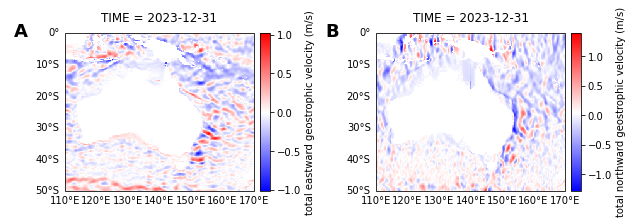

In [36]:
# We can show the individual velocity components in the notebook as follows
import holoviews as hv
from hvplot import xarray
import cartopy.crs as ccrs

# Use matplotlib backend for static plots - handy for viewing on GitHub
hv.extension('matplotlib')

# add coordinate reference system info so that xarray can interpret it
ds.attrs['crs'] = ccrs.PlateCarree()  # "WGS84"

# plot a slightly smaller subset to speed up and avoid issues around LON=180...
ds_sub = ds.sel(TIME="2023-12-31", LATITUDE=slice(-50, 0), LONGITUDE=slice(110, 170))

uplot = ds_sub.UCUR.hvplot.quadmesh(cmap='bwr', geo=True, hover=False)
vplot = ds_sub.VCUR.hvplot.quadmesh(cmap='bwr', geo=True, hover=False)
(uplot + vplot)

### Vector field

In [38]:
# hvPlot does provide a .vectorfield() method, but it needs the velocities as magnitude & angle rather than x/y components
import numpy as np
import hvplot
import matplotlib.pyplot as plt

U, V = ds_sub.UCUR, ds_sub.VCUR
mag = np.sqrt(U**2 + V**2)

# We can interpolate the data to a finer grid as follows, though this is not necessary
# This will produce a smoother looking image, and also the will always (or at least, more commonly) overlap the coastlines
resolution_multiplier = 2
new_mag = mag.fillna(0)
new_lon = np.linspace(ds_sub.LONGITUDE[0], ds_sub.LONGITUDE[-1], ds_sub.sizes["LONGITUDE"] * resolution_multiplier)
new_lat = np.linspace(ds_sub.LATITUDE[0], ds_sub.LATITUDE[-1], ds_sub.sizes["LATITUDE"] * resolution_multiplier)
new_mag = new_mag.interp(LATITUDE=new_lat, LONGITUDE=new_lon)
new_mag = new_mag.where(new_mag > 0)

# Plot data in web mercator projection
mplt = mag.hvplot.quadmesh(
    title='',
    grid=False,
    cmap='viridis',
    geo=True,
    coastline="10m",
    hover=True,
    colorbar=False,
    height=700,
    projection=ccrs.epsg(3857)
)

# Save plot without a frame or padding, with NaN as transparent and with a higher than normal resolution
fig = hvplot.render(mplt, backend="matplotlib")
fig.axes[0].set_frame_on(False)
fig.savefig('../imos-leaflet-app/public/gsla', bbox_inches='tight', pad_inches=0, transparent=True, dpi=600)

### Converting data to JSON

The data must be converted to a JSON format able to be ingested by leaflet-velocity.

Instructions for this can be found [in this guide](https://wlog.viltstigen.se/articles/2021/11/08/visualizing-wind-using-leaflet/)

In [40]:
import json
# Need to check leaflet-velocity to see if it projects the data itself... I suspect not
def to_json(dataset_in, filename):
    dataset = dataset_in.copy() # For some reason, to_dict() seems to mutate the data to use numpy arrays or something
    dataset = xr.where(np.isnan(dataset), None, dataset)
    stacked = dataset.stack(z=('LATITUDE', 'LONGITUDE'))

    dataset = dataset.to_dict()
    longitudes = dataset['coords']['LONGITUDE']['data']
    latitudes = dataset['coords']['LATITUDE']['data']

    header = {
        'parameterCategory': 2,
        'lo1': longitudes[0],
        'la1': latitudes[0],
        'dx': longitudes[1] - longitudes[0],
        'dy': - (latitudes[1] - latitudes[0]),
        'nx': len(longitudes),
        'ny': len(latitudes),
        'refTime': dataset['coords']['TIME']['data'].strftime('%d/%m/%Y')
    }
    

    with open(filename, 'w') as f:
        json.dump([
        {
            'header': {
                'parameterNumber': 2,
                **header
            },
            'data': stacked.UCUR.values.tolist()
        },
        {
            'header': {
                'parameterNumber': 3,
                **header
            },
            'data': stacked.VCUR.values.tolist()
        }
    ], f, indent=4)


In [42]:
to_json(ds_sub, '../imos-leaflet-app/src/data/gsla.json')